<a href="https://colab.research.google.com/github/AnnieMy28/initial_projects/blob/main/SQL_worldbank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install some Python packages
!pip install --quiet duckdb
!pip install --quiet jupysql
!pip install --quiet duckdb-engine
!pip install --quiet pandas
!pip install --quiet matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.7/95.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.2/414.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.6 MB/s eta 0:00:00


In [2]:
import duckdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sqlalchemy
from IPython.display import display
plt.style.use('fivethirtyeight')

# set the plots to display in the Jupyter notebook
%matplotlib inline

# change plotting colors per client request
plt.style.use('ggplot')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

%load_ext sql
conn = duckdb.connect()
%sql conn --alias duckdb

Deploy AI and data apps for free on Ploomber Cloud! Learn more: https://docs.cloud.ploomber.io/en/latest/quickstart/signup.html


In [3]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [4]:
%sql duckdb:///:memory:

In [5]:
from urllib.request import urlretrieve

urlretrieve("https://finances.worldbank.org/resource/7ipw-i7ht.csv", "net-flows.csv")
urlretrieve("https://finances.worldbank.org/resource/k6tm-smim.csv", "commitments-and-disbursements.csv")

('commitments-and-disbursements.csv',
 <http.client.HTTPMessage at 0x79e0d0ad5540>)

In [6]:
net_flows = pd.read_csv("net-flows.csv")
commit_disburse = pd.read_csv("commitments-and-disbursements.csv")

In [7]:
net_flows = net_flows[['financier', 'fiscal_year', 'region', 'country', 'gross_disbursement',
       'repayments', 'net_disbursement', 'interest', 'fees',
       'ibrd_commitments_us', 'ida_grant_commitments_us',
       'ida_non_concessional', 'ida_concessional_commitments',
       'ida_other_commitments_us']].copy()

In [8]:
commit_disburse = commit_disburse [['organization','time_period', 'region',	'country', 'category','total',
                                    'investment_lending', 'development_policy', 'program_for_results',
                                    'private_sector_window']].copy()

In [9]:
%%sql
SELECT *
FROM net_flows
LIMIT 10

,financier,fiscal_year,region,country,gross_disbursement,repayments,net_disbursement,interest,fees,ibrd_commitments_us,ida_grant_commitments_us,ida_non_concessional,ida_concessional_commitments,ida_other_commitments_us
0,IDA,2010,AFRICA,Africa,8.436194e+06,0.00,8.436194e+06,74414.55,0.0,0,0,0,0,0
1,IDA,2010,EASTERN AND SOUTHERN AFRICA,Angola,1.976786e+07,5763290.04,1.400457e+07,3590940.21,0.0,0,0,0,152500000,0
2,IBRD,2010,EASTERN AND SOUTHERN AFRICA,Botswana,2.377001e+06,0.00,2.377001e+06,0.00,803784.2,379061341,0,0,0,0
3,IDA,2010,EASTERN AND SOUTHERN AFRICA,Botswana,0.000000e+00,477444.22,-4.774442e+05,37136.58,0.0,0,0,0,0,0
4,IDA,2010,EASTERN AND SOUTHERN AFRICA,Burundi,8.824017e+07,6569.85,8.823360e+07,766709.65,0.0,0,87000000,0,0,0
5,IDA,2010,EASTERN AND SOUTHERN AFRICA,Comoros,2.327917e+06,3246186.43,-9.182699e+05,906361.82,0.0,0,8310000,0,0,0
6,IDA,2010,EASTERN AND SOUTHERN AFRICA,"Congo, Democratic Republic of",3.322973e+08,6850260.25,3.254471e+08,17247557.52,0.0,0,460000000,0,0,0
7,IDA,2010,EASTERN AND SOUTHERN AFRICA,Eritrea,4.656953e+06,4806069.58,-1.491163e+05,5202617.95,0.0,0,0,0,0,0
8,IBRD,2010,EASTERN AND SOUTHERN AFRICA,Eswatini,0.000000e+00,6342279.62,-6.342280e+06,408690.56,0.0,0,0,0,0,0
9,IDA,2010,EASTERN AND SOUTHERN AFRICA,Eswatini,0.000000e+00,250374.36,-2.503744e+05,18419.25,0.0,0,0,0,0,0


In [10]:
%%sql
SELECT *
FROM commit_disburse
LIMIT 10

,organization,time_period,region,country,category,total,investment_lending,development_policy,program_for_results,private_sector_window
0,IBRD,FY14,AFRICA,Angola,Commitments,0,0,0,0,NaN
1,IBRD,FY14,AFRICA,"Congo, Republic of",Commitments,0,0,0,0,NaN
2,IBRD,FY14,AFRICA,Gabon,Commitments,18,18,0,0,NaN
3,IBRD,FY14,AFRICA,Nigeria,Commitments,395,395,0,0,NaN
4,IBRD,FY14,AFRICA,Seychelles,Commitments,7,0,7,0,NaN
5,IBRD,FY14,EAST ASIA AND PACIFIC,China,Commitments,1615,1615,0,0,NaN
6,IBRD,FY14,EAST ASIA AND PACIFIC,Fiji,Commitments,0,0,0,0,NaN
7,IBRD,FY14,EAST ASIA AND PACIFIC,Indonesia,Commitments,1072,372,700,0,NaN
8,IBRD,FY14,EAST ASIA AND PACIFIC,Philippines,Commitments,1279,779,500,0,NaN
9,IBRD,FY14,EAST ASIA AND PACIFIC,Timor-Leste,Commitments,15,15,0,0,NaN


Which country has the largest or smallest gross disbursement?

In [12]:
%%sql
SELECT financier, region, country, gross_disbursement
FROM   net_flows
WHERE  gross_disbursement =(SELECT MAX(gross_disbursement) FROM net_flows);


,financier,region,country,gross_disbursement
0,IBRD,LATIN AMERICA AND CARIBBEAN,Mexico,4.626034e+09


2. Which country has the largest or smallest net disbursement?

In [13]:
%%sql
SELECT financier, region, country, net_disbursement
FROM   net_flows
WHERE  net_disbursement =(SELECT MAX(net_disbursement) FROM net_flows);

,financier,region,country,net_disbursement
0,IBRD,LATIN AMERICA AND CARIBBEAN,Mexico,3.939163e+09


In [14]:
%%sql
SELECT financier, region, country, net_disbursement
FROM   net_flows
WHERE  net_disbursement =(SELECT MIN(net_disbursement) FROM net_flows);

,financier,region,country,net_disbursement
0,IDA,EAST ASIA AND PACIFIC,China,-1.704373e+09


3. Which country has the largest interest

In [15]:
%%sql
SELECT financier, region, country, interest
FROM   net_flows
WHERE  interest =(SELECT MAX(interest) FROM net_flows);

,financier,region,country,interest
0,IBRD,EAST ASIA AND PACIFIC,Indonesia,271805774.6


In [16]:
%%sql
SELECT financier, region, country, interest
FROM   net_flows
WHERE  interest =(SELECT MIN(interest) FROM net_flows)
LIMIT 1;

,financier,region,country,interest
0,IBRD,EASTERN AND SOUTHERN AFRICA,Botswana,0.0


In [17]:
# total lending from the five countries in 2010
%%sql
with lending as
(SELECT country, SUM(gross_disbursement - repayments +
interest + fees	+ ibrd_commitments_us	+ ida_grant_commitments_us + ida_non_concessional
+	ida_concessional_commitments + ida_other_commitments_us) as total_lending
FROM net_flows
group by country
order by total_lending DESC
limit 5)

SELECT *
FROM lending


,country,total_lending
0,India,3.159913e+10
1,Mexico,2.062641e+10
2,Brazil,1.882421e+10
3,Indonesia,1.761234e+10
4,Vietnam,1.614055e+10


In [18]:
results3 = conn.execute(''' SELECT country, SUM(gross_disbursement - repayments +
interest + fees	+ ibrd_commitments_us	+ ida_grant_commitments_us + ida_non_concessional
+	ida_concessional_commitments + ida_other_commitments_us) as total_lending
FROM net_flows
group by country
order by total_lending DESC
limit 5; ''').df()
print(results3)

     country  total_lending
0      India   3.159913e+10
1     Mexico   2.062641e+10
2     Brazil   1.882421e+10
3  Indonesia   1.761234e+10
4    Vietnam   1.614055e+10


<ipython-input-19-abbe8fc3be38>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'country',


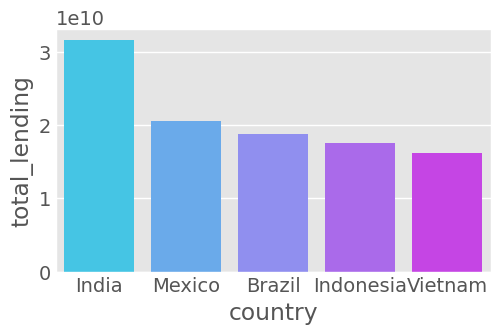

In [19]:
f, ax = plt.subplots(1, 1, figsize=(5, 3))
df = conn.execute(''' SELECT country, SUM(gross_disbursement - repayments +
interest + fees	+ ibrd_commitments_us	+ ida_grant_commitments_us + ida_non_concessional
+	ida_concessional_commitments + ida_other_commitments_us) as total_lending
FROM net_flows
group by country
order by total_lending DESC
limit 5; ''').df()

ax = sns.barplot(x = 'country',
                 y = 'total_lending',
                 data = df,
                 palette = 'cool',
                 errorbar = None)

In [20]:
%%sql

with cte AS
(SELECT n.region, n.country, n.gross_disbursement, n.net_disbursement, n.interest,
       c.total
FROM net_flows n
INNER JOIN commit_disburse c
ON n.region = c.region AND n.country = c.country)

SELECT *
FROM cte


,region,country,gross_disbursement,net_disbursement,interest,total
0,AFRICA,Africa,8.436194e+06,8.436194e+06,7.441455e+04,37
1,EAST ASIA AND PACIFIC,Cambodia,4.423419e+07,3.658665e+07,4.211926e+06,4
2,EAST ASIA AND PACIFIC,China,1.298903e+09,2.643759e+08,2.079776e+08,1530
3,EAST ASIA AND PACIFIC,China,-5.516667e+05,-3.414257e+08,7.434293e+07,1530
4,EAST ASIA AND PACIFIC,Fiji,0.000000e+00,-7.112740e+05,8.964000e+03,53
...,...,...,...,...,...,...
5009,EUROPE AND CENTRAL ASIA,Bulgaria,2.060615e+07,-7.032657e+07,2.357320e+07,31
5010,EUROPE AND CENTRAL ASIA,Bulgaria,2.204342e+07,-7.389181e+07,1.852012e+07,31
5011,EUROPE AND CENTRAL ASIA,Bulgaria,6.184115e+07,-3.297145e+07,2.453906e+07,31
5012,EUROPE AND CENTRAL ASIA,Bulgaria,4.050659e+07,-6.924694e+07,1.059752e+07,31


In [21]:
# SUM GROSS_DISBURSEMENT BY REGION
%%sql

SELECT region, SUM(gross_disbursement) as gross_disbursement1
from net_flows
group by region
ORDER BY gross_disbursement1 DESC
limit 5

,region,gross_disbursement1
0,LATIN AMERICA AND CARIBBEAN,3.912013e+10
1,EUROPE AND CENTRAL ASIA,3.284804e+10
2,EAST ASIA AND PACIFIC,2.657124e+10
3,SOUTH ASIA,2.393851e+10
4,EASTERN AND SOUTHERN AFRICA,2.263648e+10


In [22]:
# SUM NET_DISBURSEMENT BY REGION
%%sql

SELECT region, SUM(net_disbursement) as net_disbursement1
from net_flows
group by region
ORDER BY net_disbursement1 DESC
limit 5

,region,net_disbursement1
0,EASTERN AND SOUTHERN AFRICA,2.137390e+10
1,EUROPE AND CENTRAL ASIA,1.770222e+10
2,LATIN AMERICA AND CARIBBEAN,1.673362e+10
3,SOUTH ASIA,1.215284e+10
4,WESTERN AND CENTRAL AFRICA,1.185664e+10


In [23]:
# SUM INTEREST BY REGION
%%sql

SELECT region, SUM(interest) as interest1
from net_flows
group by region
ORDER BY interest1 DESC
limit 5

,region,interest1
0,LATIN AMERICA AND CARIBBEAN,5.276706e+09
1,EAST ASIA AND PACIFIC,3.325503e+09
2,EUROPE AND CENTRAL ASIA,3.007742e+09
3,SOUTH ASIA,2.601643e+09
4,EASTERN AND SOUTHERN AFRICA,1.021005e+09


In [24]:
# SUM gross disbursement BY FINACIER

%%sql

SELECT financier, SUM(gross_disbursement) as gross_disbursement2
from net_flows
group by financier
ORDER BY gross_disbursement2 DESC


,financier,gross_disbursement2
0,IBRD,1.061190e+11
1,IDA,6.163791e+10


In [25]:
# SUM net disbursement BY REGION
%%sql

SELECT financier, SUM(net_disbursement) as net_disbursement2
from net_flows
group by financier
ORDER BY net_disbursement2 DESC


,financier,net_disbursement2
0,IBRD,4.929954e+10
1,IDA,4.492115e+10


In [26]:
%%sql

with cte5 as
(SELECT fiscal_year, financier, SUM(gross_disbursement - repayments +
interest + fees	+  ida_grant_commitments_us + ida_non_concessional
+	ida_concessional_commitments + ida_other_commitments_us) as total

FROM net_flows
GROUP BY fiscal_year, financier
order by fiscal_year)

select fiscal_year, financier, total
from cte5
where financier  = 'IDA'

,fiscal_year,financier,total
0,2010,IDA,2.451111e+10
1,2011,IDA,2.491414e+10
2,2012,IDA,2.260518e+10
3,2013,IDA,2.467647e+10
4,2014,IDA,3.310582e+10
5,2015,IDA,1.118783e+10


In [27]:
%%sql

with cte6 as
(SELECT fiscal_year, financier, ROUND(SUM(gross_disbursement - repayments +
interest + fees	+  ibrd_commitments_us)/1000000, 2) as total1

FROM net_flows
GROUP BY fiscal_year, financier
order by fiscal_year)

select fiscal_year, financier, total1
from cte6
where financier  = 'IBRD'

,fiscal_year,financier,total1
0,2010,IBRD,64163.67
1,2011,IBRD,37172.48
2,2012,IBRD,30875.86
3,2013,IBRD,24293.56
4,2014,IBRD,29688.77
5,2015,IBRD,1609.59


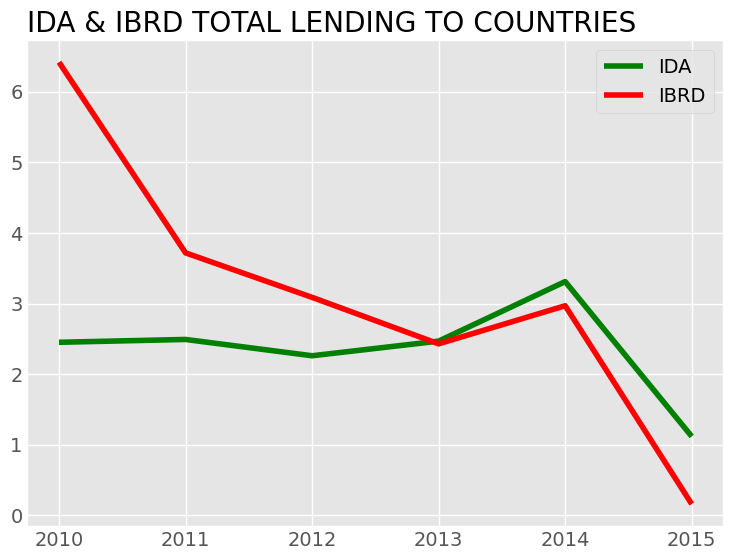

In [28]:
x = np.array([2010, 2011, 2012, 2013, 2014, 2015])
y = np.array([2.4511, 2.4914, 2.2605, 2.4676, 3.3105, 1.1187])

z = np.array([6.4163, 3.7172, 3.0875, 2.4293, 2.9688, .1609])

plt.title("IDA & IBRD TOTAL LENDING TO COUNTRIES", loc = 'left')
plt.plot(x, y, 'g', label='IDA')
plt.plot(x, z, 'r', label='IBRD')

plt.legend()
plt.show()

In [29]:
%%sql

SELECT financier, ROUND(sum(gross_disbursement)/1000000, 2) as gross_disbursement3,
        ROUND(sum(net_disbursement)/1000000, 2) as net_disbursement3,
        ROUND(sum(interest)/1000000, 2) as interest3
FROM net_flows
GROUP BY financier

,financier,gross_disbursement3,net_disbursement3,interest3
0,IBRD,106118.97,49299.54,11991.24
1,IDA,61637.91,44921.15,4828.34


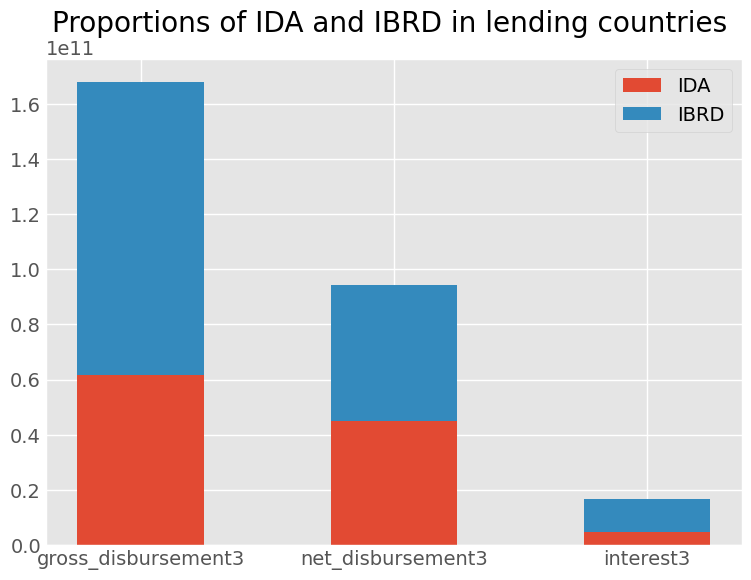

In [30]:
name_accounts = (
    "gross_disbursement3",
    "net_disbursement3",
    "interest3",
)
usd_billion = {
    "IDA": np.array([6.163791e+10, 4.492115e+10, 4.828338e+09]),
    "IBRD": np.array([1.061190e+11, 4.929954e+10, 1.199124e+10]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, usd_billion in usd_billion.items():
    p = ax.bar(name_accounts, usd_billion, width, label=boolean, bottom=bottom)
    bottom += usd_billion

ax.set_title("Proportions of IDA and IBRD in lending countries ")
ax.legend(loc="upper right")

plt.show()

In [31]:
# LIST OF 5 COUNTRIES HAVING TOTAL IN COMMIT_DISBURSE

%%sql
SELECT organization, region, country, total
FROM   commit_disburse
WHERE  total <= (SELECT MAX(investment_lending) FROM commit_disburse)
limit 5


,organization,region,country,total
0,IBRD,AFRICA,Angola,0
1,IBRD,AFRICA,"Congo, Republic of",0
2,IBRD,AFRICA,Gabon,18
3,IBRD,AFRICA,Nigeria,395
4,IBRD,AFRICA,Seychelles,7


In [32]:
# LIST OF 5 COUNTRIES HAVING INVESTMENT_LENDING IN COMMIT_DISBURSE

%%sql
SELECT organization, region, country, investment_lending
FROM   commit_disburse
WHERE  investment_lending <= (SELECT MAX(investment_lending) FROM commit_disburse)
LIMIT 5

,organization,region,country,investment_lending
0,IBRD,AFRICA,Angola,0
1,IBRD,AFRICA,"Congo, Republic of",0
2,IBRD,AFRICA,Gabon,18
3,IBRD,AFRICA,Nigeria,395
4,IBRD,AFRICA,Seychelles,0


In [33]:
%%sql
with cte3 as
(SELECT time_period, organization, category, sum(total) as total,

FROM commit_disburse
GROUP BY time_period, organization , category
order by time_period,  category)

select time_period, organization, category, total
from cte3
where organization = 'IBRD'


,time_period,organization,category,total
0,FY14,IBRD,Commitments,18605.0
1,FY14,IBRD,Gross Disbursements,18757.0
2,FY15,IBRD,Commitments,23531.0
3,FY15,IBRD,Gross Disbursements,19016.0
4,FY16,IBRD,Commitments,29730.0
5,FY16,IBRD,Gross Disbursements,22530.0
6,FY17,IBRD,Commitments,22611.0
7,FY17,IBRD,Gross Disbursements,17847.0


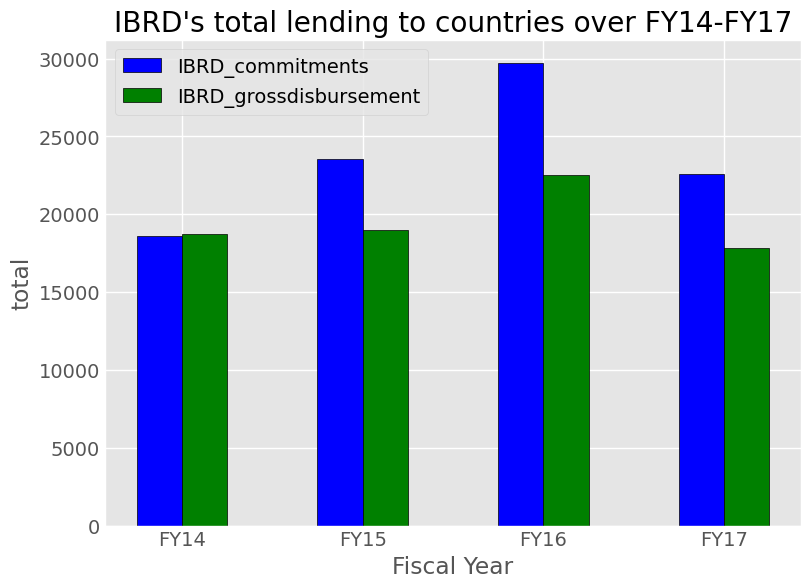

In [34]:
IBRD_commitments = [18605.0, 23531.0, 29730.0, 22611.0]
IBRD_grossdisbursement  = [18757.0, 19016.0, 22530.0, 17847.0 ]

n=4
r = np.arange(n)
width = 0.25


plt.bar(r, IBRD_commitments, color = 'b',
        width = width, edgecolor = 'black',
        label='IBRD_commitments')
plt.bar(r + width, IBRD_grossdisbursement, color = 'g',
        width = width, edgecolor = 'black',
        label='IBRD_grossdisbursement')

plt.xlabel("Fiscal Year")
plt.ylabel("total")
plt.title("IBRD's total lending to countries over FY14-FY17")


plt.xticks(r + width/2,['FY14','FY15','FY16','FY17'])
plt.legend()

plt.show()

In [35]:
%%sql
with cte3 as
(SELECT time_period, organization, category, sum(total) as total,

FROM commit_disburse
GROUP BY time_period, organization , category
order by time_period,  category)

select time_period, organization, category, total
from cte3
where organization = 'IDA'

,time_period,organization,category,total
0,FY14,IDA,Commitments,22243.0
1,FY14,IDA,Gross Disbursements,13431.0
2,FY15,IDA,Commitments,18968.0
3,FY15,IDA,Gross Disbursements,12907.0
4,FY16,IDA,Commitments,16173.0
5,FY16,IDA,Gross Disbursements,13187.0


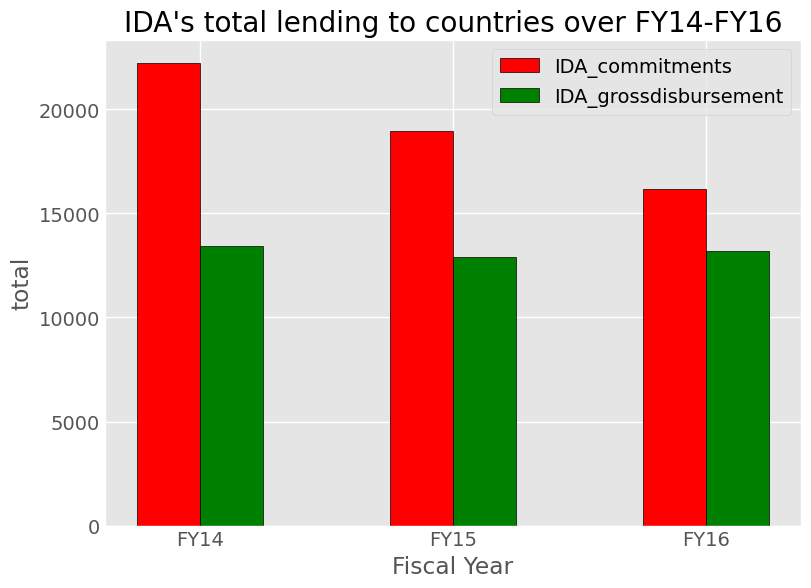

In [36]:
IDA_commitments = [22243.0, 18968.0, 16173.0]
IDA_grossdisbursement  = [13431.0, 12907.0, 13187.0]


n=3
r = np.arange(n)
width = 0.25


plt.bar(r, IDA_commitments, color = 'r',
        width = width, edgecolor = 'black',
        label='IDA_commitments')
plt.bar(r + width, IDA_grossdisbursement, color = 'g',
        width = width, edgecolor = 'black',
        label='IDA_grossdisbursement')

plt.xlabel("Fiscal Year")
plt.ylabel("total")
plt.title("IDA's total lending to countries over FY14-FY16")


plt.xticks(r + width/2,['FY14','FY15','FY16'])
plt.legend()

plt.show()

In [37]:
%%sql

with cte1 as
(SELECT fiscal_year, financier,
 sum(gross_disbursement) as gross_disbursement,
sum(net_disbursement) as net_disbursement,
sum(interest) as interest
FROM net_flows
GROUP BY fiscal_year , financier
ORDER BY fiscal_year ASC)

select * from cte1


,fiscal_year,financier,gross_disbursement,net_disbursement,interest
0,2010,IDA,1.146010e+10,9.111741e+09,8.476808e+08
1,2010,IBRD,2.885516e+10,1.723019e+10,2.621056e+09
2,2011,IDA,1.026856e+10,7.767002e+09,8.671190e+08
3,2011,IBRD,2.187985e+10,7.994652e+09,2.334855e+09
4,2012,IBRD,1.977501e+10,7.796759e+09,2.429183e+09
5,2012,IDA,1.106030e+10,6.924045e+09,9.252422e+08
6,2013,IDA,1.122839e+10,7.372304e+09,1.002873e+09
7,2013,IBRD,1.602644e+10,6.548517e+09,2.398256e+09
8,2014,IBRD,1.876750e+10,8.954301e+09,2.082972e+09
9,2014,IDA,1.343171e+10,9.877476e+09,9.859700e+08


In [38]:
%%sql
with cte4 as
(SELECT time_period, organization, category, sum(total) as total,

FROM commit_disburse
GROUP BY time_period, organization , category
order by time_period,  category)

select time_period, organization, category, total
from cte4
where organization = 'IDA'

,time_period,organization,category,total
0,FY14,IDA,Commitments,22243.0
1,FY14,IDA,Gross Disbursements,13431.0
2,FY15,IDA,Commitments,18968.0
3,FY15,IDA,Gross Disbursements,12907.0
4,FY16,IDA,Commitments,16173.0
5,FY16,IDA,Gross Disbursements,13187.0


In [39]:
%%sql

SELECT time_period, country, SUM(total) AS total5

FROM commit_disburse
WHERE country = 'Vietnam'OR country = 'China' OR country = 'Indonesia'
      OR country = 'Chile' OR country = 'Angola'

GROUP BY time_period, country
order by country


,time_period,country,total5
0,FY14,Angola,146.0
1,FY15,Angola,710.0
2,FY16,Angola,499.0
3,FY17,Angola,340.0
4,FY14,Chile,18.0
5,FY15,Chile,0.0
6,FY16,Chile,161.0
7,FY17,Chile,186.0
8,FY14,China,2862.0
9,FY15,China,3388.0


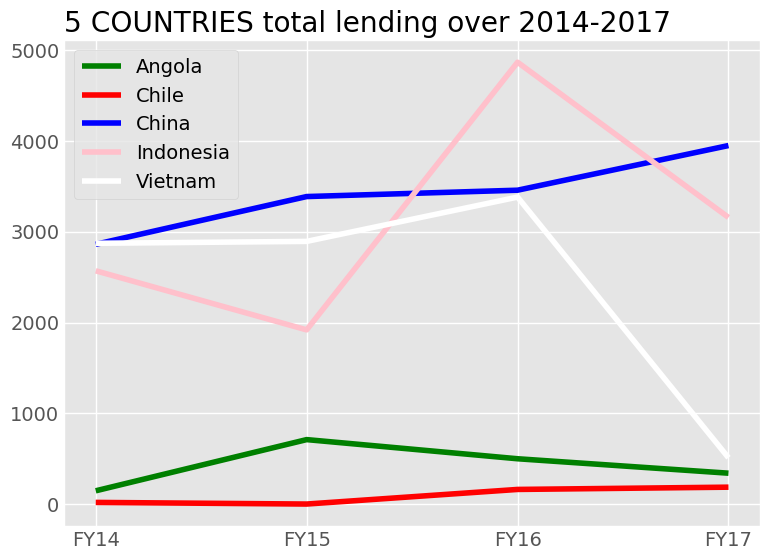

In [40]:
time_period = np.array(['FY14', 'FY15', 'FY16', 'FY17'])
Angola = np.array([146.0, 710.0, 499., 340.0])
Chile = np.array([18.0, 0.0, 161.0, 186.0])
China = np.array ([2862.0, 3388.0, 3458.0, 3950.0])
Indonesia = np.array([2570.0, 1919.0, 4868.0, 3158.0])
Vietnam = np.array([2873.0, 2894.0, 3382.0, 510.0 ])


plt.title("5 COUNTRIES total lending over 2014-2017", loc = 'left')
plt.plot(time_period, Angola, 'g', label='Angola')
plt.plot(time_period, Chile, 'r', label='Chile')
plt.plot(time_period, China, 'b', label = 'China')
plt.plot(time_period, Indonesia, 'pink', label = 'Indonesia')
plt.plot(time_period, Vietnam, 'w', label = 'Vietnam')

plt.legend()
plt.show()